1) Delivery_time -> Predict delivery time using sorting time 

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model.

In [1]:
#importing libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import warnings 
warnings.filterwarnings("ignore")

In [2]:
#importing data set
import pandas as pd
data=pd.read_csv("delivery_time.csv")
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

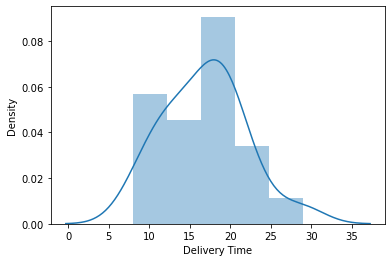

In [5]:
sns.distplot(data['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

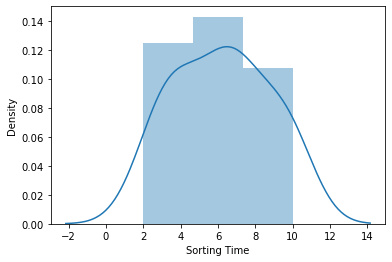

In [6]:
sns.distplot(data['Sorting Time'])

In [7]:
data.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [8]:
data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

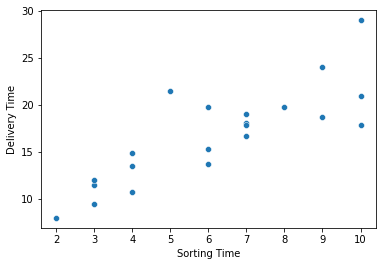

In [9]:
sns.scatterplot(x='Sorting Time', y='Delivery Time', data=data)

In [10]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [11]:
data1=data.rename(columns={'Delivery Time':'DT','Sorting Time':'ST'})
data1

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [12]:
#building the SLR model
model = smf.ols("DT~ST",data=data1).fit()

<AxesSubplot:xlabel='ST', ylabel='DT'>

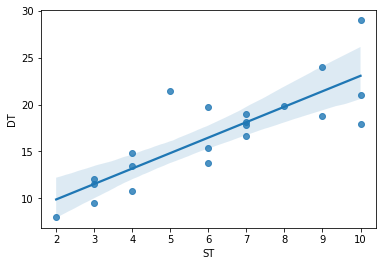

In [13]:
sns.regplot(x='ST', y='DT', data=data1)

In [14]:
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [15]:
data1.head(2)

,DT,ST
0,21.0,10
1,13.5,4


In [16]:
model.fittedvalues

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [17]:
data1['Predicted']=model.fittedvalues
data1.head(2)

,DT,ST,Predicted
0,21.0,10,23.072933
1,13.5,4,13.178814


In [18]:
data1['Error']=data1['ST']-data1['Predicted']
data1.head(2)

,DT,ST,Predicted,Error
0,21.0,10,23.072933,-13.072933
1,13.5,4,13.178814,-9.178814


In [19]:
data1['Error_sqr']=(data1['Error'])**2
data1.head(2)

,DT,ST,Predicted,Error,Error_sqr
0,21.0,10,23.072933,-13.072933,170.901576
1,13.5,4,13.178814,-9.178814,84.250618


In [20]:
mean_squared_error = data1['Error_sqr'].mean()
mean_squared_error

114.96240749903501

In [21]:
model.rsquared
# modoel is 68.22 percent accurate

0.6822714748417231

In [22]:
model.pvalues

Intercept    0.001147
ST           0.000004
dtype: float64

# Prediction for new data point 

In [23]:
#predict for 8 and 6 sorting time
newdata= pd.Series([8,6])
newdata

0    8
1    6
dtype: int64

In [24]:
new_pred=pd.DataFrame(newdata, columns=['ST1'])
new_pred

,ST1
0,8
1,6


In [25]:
# y = c+(mx)
6.5827+(1.6490*8)

19.7747

In [26]:
# y = c+(mx)
6.5827+(1.6490*6)

16.4767

# LOG TRANSFORMATION OF INDEPENDEMT VARIABLE

In [27]:
data.head(2)

,Delivery Time,Sorting Time
0,21.0,10
1,13.5,4


In [28]:
data2=data.rename(columns={'Delivery Time':'DT2','Sorting Time':'ST2'})
data2

,DT2,ST2
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [29]:
# application of log transformation
data2['ST_log']=data2['ST2'].transform([np.log])
data2

,DT2,ST2,ST_log
0,21.00,10,2.302585
1,13.50,4,1.386294
2,19.75,6,1.791759
3,24.00,9,2.197225
4,29.00,10,2.302585
5,15.35,6,1.791759
6,19.00,7,1.945910
7,9.50,3,1.098612
8,17.90,10,2.302585
9,18.75,9,2.197225


In [30]:
model2 = smf.ols("DT2~ST_log",data=data2).fit()

<AxesSubplot:xlabel='ST_log', ylabel='DT2'>

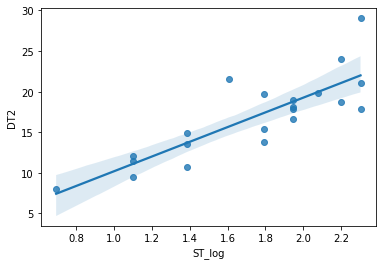

In [31]:
sns.regplot(x='ST_log', y='DT2', data=data2)

In [32]:
model2.params

Intercept    1.159684
ST_log       9.043413
dtype: float64

In [33]:
model2.fittedvalues

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [34]:
data2['Predicted2']=model2.fittedvalues
data2.head(2)

,DT2,ST2,ST_log,Predicted2
0,21.0,10,2.302585,21.982913
1,13.5,4,1.386294,13.696517


In [35]:
data2['Error2']=data2['ST_log']-data2['Predicted2']
data2.head(2)

,DT2,ST2,ST_log,Predicted2,Error2
0,21.0,10,2.302585,21.982913,-19.680327
1,13.5,4,1.386294,13.696517,-12.310222


In [36]:
data2['Error_sqr2']=(data2['Error2'])**2
data2.head(2)

,DT2,ST2,ST_log,Predicted2,Error2,Error_sqr2
0,21.0,10,2.302585,21.982913,-19.680327,387.315288
1,13.5,4,1.386294,13.696517,-12.310222,151.541571


In [37]:
mean_squared_error2 = data2['Error_sqr2'].mean()
mean_squared_error2

240.3724676208438

In [38]:
model2.rsquared
# model is 69.54 % accurate

0.6954434611324223

In [39]:
model2.pvalues

Intercept    0.641980
ST_log       0.000003
dtype: float64

# SQUARE ROOT TRANSFORMATION OF INDEPENDEMT VARIABLE

In [40]:
data.head(2)

,Delivery Time,Sorting Time
0,21.0,10
1,13.5,4


In [41]:
data3=data.rename(columns={'Delivery Time':'DT3','Sorting Time':'ST3'})
data3

,DT3,ST3
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [42]:
#application of square root transformation
data3['ST_sqrt3']=data3['ST3'].transform([np.sqrt])
data3

,DT3,ST3,ST_sqrt3
0,21.00,10,3.162278
1,13.50,4,2.000000
2,19.75,6,2.449490
3,24.00,9,3.000000
4,29.00,10,3.162278
5,15.35,6,2.449490
6,19.00,7,2.645751
7,9.50,3,1.732051
8,17.90,10,3.162278
9,18.75,9,3.000000


In [43]:
model3 = smf.ols("DT3~ST_sqrt3",data=data3).fit()

<AxesSubplot:xlabel='ST_sqrt3', ylabel='DT3'>

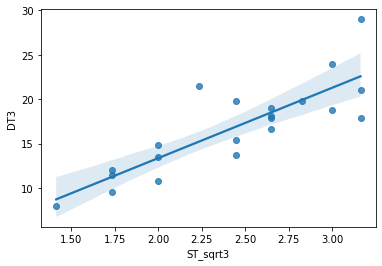

In [44]:
sns.regplot(x='ST_sqrt3', y='DT3', data=data3)

In [45]:
model3.params

Intercept   -2.518837
ST_sqrt3     7.936591
dtype: float64

In [46]:
model3.fittedvalues

0     22.578867
1     13.354345
2     16.921761
3     21.290936
4     22.578867
5     16.921761
6     18.479409
7     11.227742
8     22.578867
9     21.290936
10    19.929232
11    13.354345
12    18.479409
13    11.227742
14    11.227742
15    13.354345
16    16.921761
17    18.479409
18     8.705198
19    18.479409
20    15.227920
dtype: float64

In [47]:
data3['Predicted3']=model3.fittedvalues
data3.head(2)

,DT3,ST3,ST_sqrt3,Predicted3
0,21.0,10,3.162278,22.578867
1,13.5,4,2.000000,13.354345


In [48]:
data3['Error3']=data3['ST_sqrt3']-data3['Predicted3']
data3.head(2)

,DT3,ST3,ST_sqrt3,Predicted3,Error3
0,21.0,10,3.162278,22.578867,-19.416589
1,13.5,4,2.000000,13.354345,-11.354345


In [49]:
data3['Error_sqr3']=(data3['Error3'])**2
data3.head(2)

,DT3,ST3,ST_sqrt3,Predicted3,Error3,Error_sqr3
0,21.0,10,3.162278,22.578867,-19.416589,377.003942
1,13.5,4,2.000000,13.354345,-11.354345,128.921148


In [50]:
mean_squared_error3 = data3['Error_sqr3'].mean()
mean_squared_error3

219.18758559313952

In [51]:
model3.rsquared

0.6958062276308671

In [52]:
model3.pvalues

Intercept    0.410857
ST_sqrt3     0.000003
dtype: float64

# Prediction for new data point

In [53]:
#predict for 3 and 10 sorting time
newdata= pd.Series([3,10])
newdata

0     3
1    10
dtype: int64

In [54]:
new_pred=pd.DataFrame(newdata, columns=['ST2'])
new_pred

,ST2
0,3
1,10


In [55]:
# y = c+(mx)
-2.518837+(7.936591*3)

21.290936

In [56]:
# y = c+(mx)
-2.518837+(7.936591*10)

76.847073

# RECIPROCAL TRANSFORMATION OF INDEPENDEMT VARIABLE

In [57]:
data.head(2)

,Delivery Time,Sorting Time
0,21.0,10
1,13.5,4


In [58]:
data4=data.rename(columns={'Delivery Time':'DT4','Sorting Time':'ST4'})
data4

,DT4,ST4
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [59]:
# application of reciprocal transformaton
data4['ST_rec4']=data4['ST4'].transform([np.reciprocal])
data4

,DT4,ST4,ST_rec4
0,21.00,10,0
1,13.50,4,0
2,19.75,6,0
3,24.00,9,0
4,29.00,10,0
5,15.35,6,0
6,19.00,7,0
7,9.50,3,0
8,17.90,10,0
9,18.75,9,0


In [60]:
model4 = smf.ols("DT4~ST_rec4",data=data4).fit()

<AxesSubplot:xlabel='ST_rec4', ylabel='DT4'>

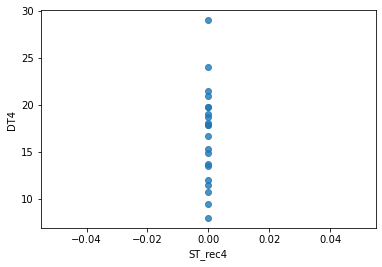

In [61]:
sns.regplot(x='ST_rec4', y='DT4', data=data4)

In [62]:
model4.params

Intercept    16.790952
ST_rec4       0.000000
dtype: float64

In [63]:
model4.fittedvalues

0     16.790952
1     16.790952
2     16.790952
3     16.790952
4     16.790952
5     16.790952
6     16.790952
7     16.790952
8     16.790952
9     16.790952
10    16.790952
11    16.790952
12    16.790952
13    16.790952
14    16.790952
15    16.790952
16    16.790952
17    16.790952
18    16.790952
19    16.790952
20    16.790952
dtype: float64

In [64]:
data4['Predicted4']=model4.fittedvalues
data4.head(2)

,DT4,ST4,ST_rec4,Predicted4
0,21.0,10,0,16.790952
1,13.5,4,0,16.790952


In [65]:
data4['Error4']=data4['ST_rec4']-data4['Predicted4']
data4.head(2)

,DT4,ST4,ST_rec4,Predicted4,Error4
0,21.0,10,0,16.790952,-16.790952
1,13.5,4,0,16.790952,-16.790952


In [66]:
data4['Error_sqr4']=(data4['Error4'])**2
data4.head(2)

,DT4,ST4,ST_rec4,Predicted4,Error4,Error_sqr4
0,21.0,10,0,16.790952,-16.790952,281.936082
1,13.5,4,0,16.790952,-16.790952,281.936082


In [67]:
mean_squared_error4 = data4['Error_sqr4'].mean()
mean_squared_error4

281.93608185941036

In [68]:
model4.rsquared
# model is zero percent accurate

0.0

In [69]:
model4.pvalues

Intercept    1.973651e-12
ST_rec4               NaN
dtype: float64

# SQUARE TRANSFORMATION OF INDEPENDEMT VARIABLE

In [70]:
data.head(2)

,Delivery Time,Sorting Time
0,21.0,10
1,13.5,4


In [71]:
data5=data.rename(columns={'Delivery Time':'DT5','Sorting Time':'ST5'})
data5

,DT5,ST5
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [72]:
#applicaion of square transformation
data5['ST_sqr5']=data5['ST5'].transform([np.square])
data5

,DT5,ST5,ST_sqr5
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100
5,15.35,6,36
6,19.00,7,49
7,9.50,3,9
8,17.90,10,100
9,18.75,9,81


In [73]:
model5 = smf.ols("DT5~ST_sqr5",data=data5).fit()

<AxesSubplot:xlabel='ST_sqr5', ylabel='DT5'>

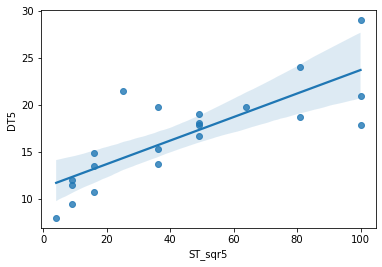

In [74]:
sns.regplot(x='ST_sqr5', y='DT5', data=data5)

In [75]:
model5.params

Intercept    11.237205
ST_sqr5       0.124870
dtype: float64

In [76]:
model5.fittedvalues

0     23.724217
1     13.235127
2     15.732529
3     21.351685
4     23.724217
5     15.732529
6     17.355841
7     12.361036
8     23.724217
9     21.351685
10    19.228893
11    13.235127
12    17.355841
13    12.361036
14    12.361036
15    13.235127
16    15.732529
17    17.355841
18    11.736686
19    17.355841
20    14.358958
dtype: float64

In [77]:
data5['Predicted5']=model5.fittedvalues
data5.head(2)

,DT5,ST5,ST_sqr5,Predicted5
0,21.0,10,100,23.724217
1,13.5,4,16,13.235127


In [78]:
data5['Error5']=data5['ST_sqr5']-data5['Predicted5']
data5.head(2)

,DT5,ST5,ST_sqr5,Predicted5,Error5
0,21.0,10,100,23.724217,76.275783
1,13.5,4,16,13.235127,2.764873


In [79]:
data5['Error_sqr5']=(data5['Error5'])**2
data5.head(2)

,DT5,ST5,ST_sqr5,Predicted5,Error5,Error_sqr5
0,21.0,10,100,23.724217,76.275783,5817.995061
1,13.5,4,16,13.235127,2.764873,7.644522


In [80]:
mean_squared_error5 = data5['Error_sqr5'].mean()
mean_squared_error5

1525.8054211472765

In [81]:
model5.rsquared
#mdoel is 63 % accurate

0.6302871815826637

In [82]:
model5.pvalues

Intercept    1.415704e-08
ST_sqr5      1.739194e-05
dtype: float64

# LOG TRANSFORMATION HAS 69.54 % ACCURACY AND IT IS THE HIGHEST OF ALL.